# Projet Data Science de A à Z

In [1]:
# Importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [2]:
# Importation des données
df_train = pd.read_csv("data/train.csv")
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:

# pd.set_option("display.max_rows", df.shape[0]+1) # Afficher toute le dataset
# pd.set_option("display.max_rows", 10) # Afficher seulement 10 lignes

In [4]:
# Infos sur le dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Vérification des valeurs manquantes
df_train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Stats descriptives des variables numériques
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Stats descriptives des variables catégorielles
df_train.describe(include="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


### Separation des variables numériques et catégorielles

In [8]:
num_cols, cat_cols = [], []

num_cols = df_train.select_dtypes(exclude='object')
cat_cols = df_train.select_dtypes(include='object')
cat_cols.drop(columns="Loan_ID", axis=1, inplace=True)

In [9]:
# Affichage des colonnes numériques
num_cols

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [10]:
# Affichage des colonnes catégoriques
cat_cols

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


### Traitement des valeurs manquantes

In [11]:
# Pour les variables catégorielles on remplace par la valeur qui se repete le plus
cat_cols = cat_cols.apply(lambda x: x.fillna(x.value_counts().index[0]))
cat_cols.isnull().sum().any()

False

In [12]:
# Pour les variables numériques on remplace par la valeur précédente
num_cols.fillna(method='bfill', inplace=True)
num_cols.isnull().sum().any()

C:\Users\apoll\AppData\Local\Temp\ipykernel_21516\172966511.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_cols.fillna(method='bfill', inplace=True)


False

### Transformation des données

In [13]:
# Transformation des données à la main
target_value = {"Y": 1, "N": 0}
target = cat_cols.Loan_Status

cat_cols.drop("Loan_Status", axis=1, inplace=True)
target = target.map(target_value)

In [14]:
# Transformation des données avec LabelEncoder

label_encoder = LabelEncoder()
for i in cat_cols:
    cat_cols[i] = label_encoder.fit_transform(cat_cols[i])
    
cat_cols

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2
...,...,...,...,...,...,...
609,0,0,0,0,0,0
610,1,1,3,0,0,0
611,1,1,1,0,0,2
612,1,1,2,0,0,2


In [15]:
# Concatenation des variables numériques et categorielles
df = pd.concat([num_cols, cat_cols, target], axis=1)
X = df.drop(columns="Loan_Status")
y = target

In [16]:
target.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

### Analyse exploratoire

Le nombre de crédit accordé est : 68.73%
Le nombre de crédit non accordé est : 31.27%


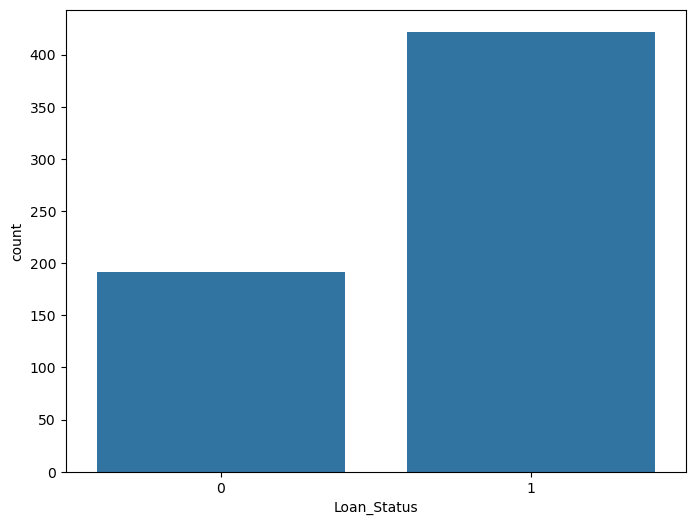

In [17]:
# Visualisation de la variable cible
plt.figure(figsize=(8, 6))
sns.countplot(x=target, data=df)
yes = round((target.value_counts()[1] / len(target)) * 100, 2)
no = round((target.value_counts()[0] / len(target)) * 100, 2)
print(f"Le nombre de crédit accordé est : {yes}%")
print(f"Le nombre de crédit non accordé est : {no}%")

c:\Users\apoll\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


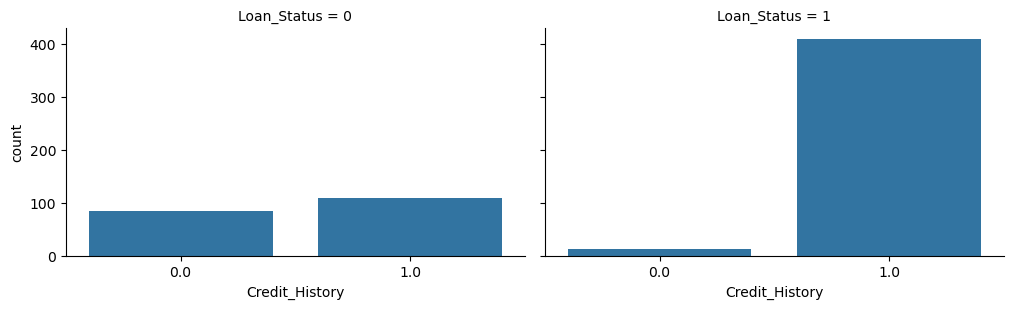

In [18]:
# Relation en Loan_Status VS Credit_History
grid = sns.FacetGrid(df, col="Loan_Status", height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')
plt.show()

c:\Users\apoll\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


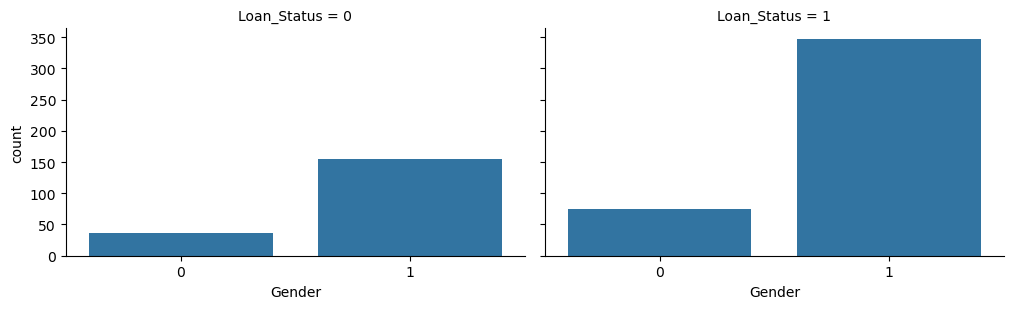

In [19]:
# Relation en Loan_Status VS Gender
grid = sns.FacetGrid(df, col="Loan_Status", height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender')
plt.show()

c:\Users\apoll\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


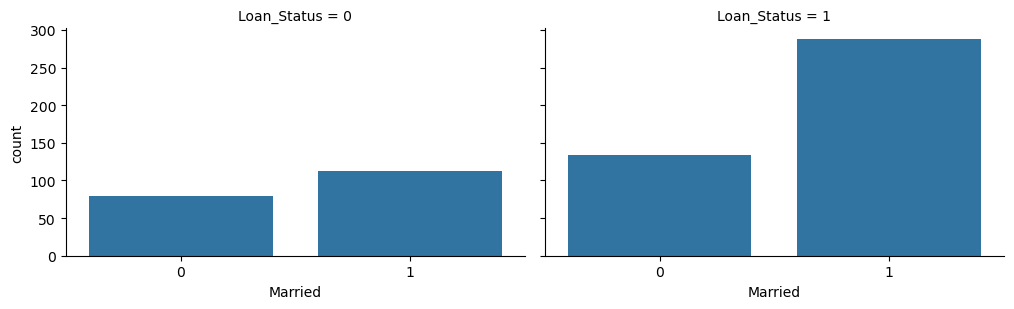

In [20]:
# Relation en Loan_Status VS Married
grid = sns.FacetGrid(df, col="Loan_Status", height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Married')
plt.show()

c:\Users\apoll\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


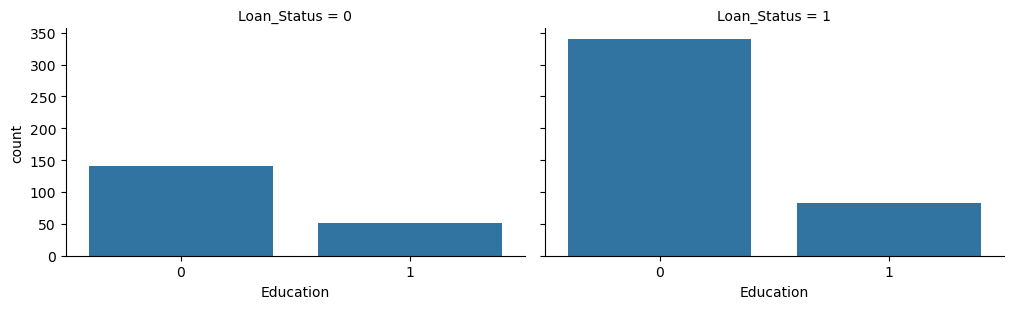

In [21]:
# Relation en Loan_Status VS Education
grid = sns.FacetGrid(df, col="Loan_Status", height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education')
plt.show()

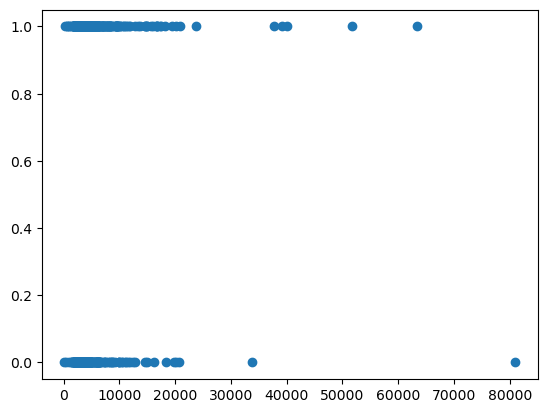

In [22]:
# Revenu du demandeur
plt.scatter(df["ApplicantIncome"], df["Loan_Status"])
plt.show()

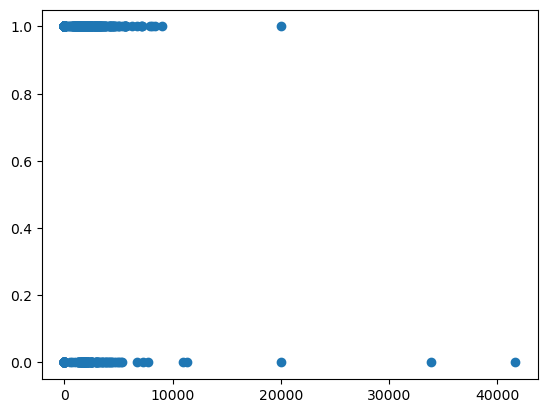

In [23]:
# Revenu du conjoint
plt.scatter(df["CoapplicantIncome"], df["Loan_Status"])
plt.show()

In [24]:
df.groupby('Loan_Status').median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
Loan_Status,,,,,,,,,,,
0,3833.5,268.0,132.5,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
1,3812.5,1239.5,127.5,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


### Réalisation du modèle

In [25]:
# Diviser les données en train et test
seed = 42
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)
for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print("X_train taille : ", X_train.shape)
print("X_test taille : ", X_test.shape)
print("y_train taille : ", y_train.shape)
print("y_test taille : ", y_test.shape)

X_train taille :  (491, 11)
X_test taille :  (123, 11)
y_train taille :  (491,)
y_test taille :  (123,)


In [26]:
# On va appliquer les algorithmes Regression logistique, KNN, Decisiontree

models = {
    "LogisticRegression": LogisticRegression(random_state=seed),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=1, random_state=seed) 
}

# Fonction de prediction
def accuray(y_true, y_pred, retu=False):
    acc = round(accuracy_score(y_true, y_pred), 2) * 100
    if retu:
        return acc
    else:
        print(f"La précision du modèle est : {acc}%")
        
# Fonction d'application du modèle
def evaluate_model(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        print(name, ":")
        model.fit(X_train, y_train)
        accuray(y_test, model.predict(X_test))
        print("_"*30)
        
evaluate_model(models, X_train, X_test, y_train, y_test)

LogisticRegression :
La précision du modèle est : 85.0%
______________________________
KNeighborsClassifier :
La précision du modèle est : 65.0%
______________________________
DecisionTreeClassifier :
La précision du modèle est : 85.0%
______________________________


c:\Users\apoll\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# Selection de features pour le modele
X_2 = X[["Credit_History", "Gender", "Education", "Married", "ApplicantIncome", "CoapplicantIncome"]]

In [28]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)
for train, test in sss.split(X_2, y):
    X_train, X_test = X_2.iloc[train], X_2.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print("X_train taille : ", X_train.shape)
print("X_test taille : ", X_test.shape)
print("y_train taille : ", y_train.shape)
print("y_test taille : ", y_test.shape)

X_train taille :  (491, 6)
X_test taille :  (123, 6)
y_train taille :  (491,)
y_test taille :  (123,)


In [29]:
evaluate_model(models, X_train, X_test, y_train, y_test)

LogisticRegression :
La précision du modèle est : 85.0%
______________________________
KNeighborsClassifier :
La précision du modèle est : 66.0%
______________________________
DecisionTreeClassifier :
La précision du modèle est : 85.0%
______________________________


c:\Users\apoll\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Deploiement du modèle

In [30]:
# Appliquer la regression logistique sur les données
lr = LogisticRegression()
lr.fit(X_2, y)

c:\Users\apoll\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
# Enregistrement du modèle
pickle.dump(lr, open("models/model.pkl", "wb"))